# PART I:

<h1>EDA & Data Preprocessing on Google App Store Rating Dataset</h1>

<h3>Domain: Mobile device apps</h3>

__Context:__

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

__Objective:__
The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

__Data set Information:__
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

__Attribute Information:__

1. __App__ : Application name
2. __Category__ : Category the app belongs to.
3. __Rating__ : Overall user rating of the app
4. __Reviews__: Number of Reviews 
5. __Size__ : Size of the app
6. __Installs__ : Number of user reviews for the app
7. __Type__ : Paid or Free
8. __Price__ : Price of the app
9. __Content Rating__ : Age group the app is targeted at - children/Mature 21+ /Adult
10. __Genres__ : An app can belong to multiple genres (apart from its main category). For eg. a musical family game will belong to Music, Game, Family genres.
11. __Last Updated__ : Date when the app was last updated on play store.
12. __Current Ver__ : Current version of the app available on play store.
13. __Android Ver__ : Min required Android Version.



### 1. Import required libraries and read the dataset.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
import warnings as warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Google_app_data.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [4]:
df.head()                #first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df['Category'].nunique()

34

In [6]:
df.shape     #dataset has 10841 Rows and 13 Columns

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.describe(include=object) 

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


- Rating has some missing value.
- Category, Type, Content Rating, Genres will have to encoded either through one hot or Label encoding.
- Reviews of is of type object, we have to convert that into numeric data type. 

- Size column is in string format, treat non numeric data, finally convert it to a numerical data type.

- Installs column is in string format,treat non numeric data, convert it to a numerical format .

- Type column has one missing value, impute missing value.

- Price column has to be converted to a numerical data type.

- Content Rating column has one missing value,we can impute or drop the missing value.

- Current Ver and Android Ver columns is object, we have to convert them into a numeric data type .

- Last Updated column is in object format, we can convert it to a datetime.


### 4. Check if there are any duplicate records in the dataset? if any drop them.


In [10]:
df.duplicated().sum()

483

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(10358, 13)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [14]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df.drop(10472,inplace=True)

In [17]:
df.shape

(10357, 13)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [18]:
df['Rating'].isnull().sum() 

1465

In [19]:
df.dropna(subset=['Rating'],inplace=True)

In [20]:
df['Rating_category']=np.where(df['Rating']>3.5,"High","Low")

In [21]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,High
8685,Dp For Whatsapp,SOCIAL,4.3,39,12M,"5,000+",Free,0,Everyone,Social,"April 13, 2017",1.0,4.0.3 and up,High
436,Call Blocker,COMMUNICATION,4.1,17529,10M,"1,000,000+",Free,0,Everyone,Communication,"July 26, 2018",5.86,4.0.3 and up,High
3217,Agoda – Hotel Booking Deals,TRAVEL_AND_LOCAL,4.6,263525,Varies with device,"10,000,000+",Free,0,Everyone,Travel & Local,"August 4, 2018",Varies with device,Varies with device,High
8267,DC Public Library,BOOKS_AND_REFERENCE,4.2,20,3.4M,"1,000+",Free,0,Everyone,Books & Reference,"June 8, 2015",4.6.1,1.6 and up,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


<Axes: ylabel='Rating_category'>

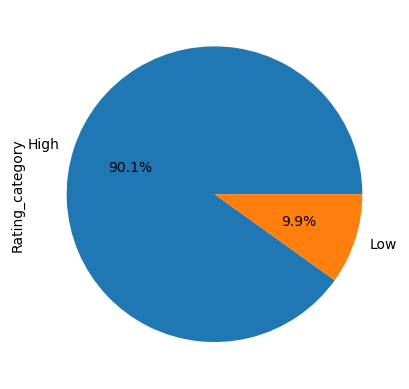

In [22]:
df['Rating_category'].value_counts().plot(kind='pie',autopct="%1.1f%%")

#we can see that nearly 90% of the apps in Google play store has Overall user rating >3.5
#only 10% of the apps in google play store has  overall user rating <=3.5

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [23]:
df['Reviews']=df['Reviews'].astype(int)

<Axes: xlabel='Reviews'>

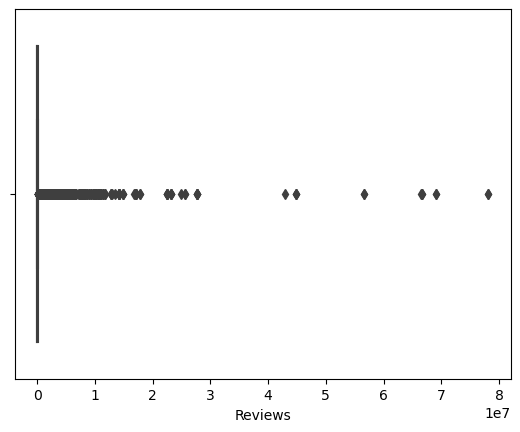

In [24]:
sns.boxplot(data=df,x="Reviews")

In [25]:
df['Reviews']=np.log1p(df['Reviews'])

<Axes: xlabel='Reviews'>

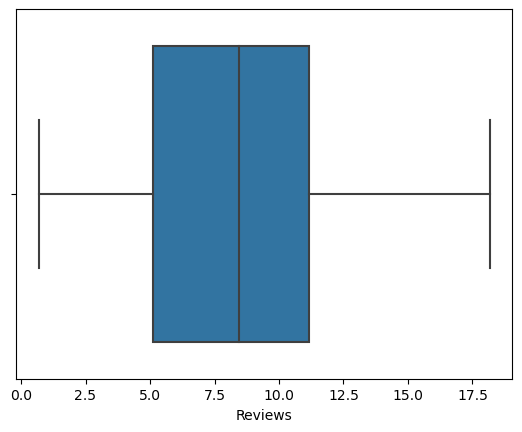

In [26]:
sns.boxplot(data=df,x="Reviews")

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [27]:
df=df[df['Size']!='Varies with device']


In [28]:
df.shape

(7424, 14)

In [29]:
df['Size']=df['Size'].str.replace('M','000000').str.replace('K','000').str.replace('k','000').astype(float)

In [30]:
df 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,4.0,2.079442,2.6,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High


In [31]:
df['Size'].dtype

dtype('float64')

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [32]:
df['Installs']=df['Installs'].str.replace(",","").str.replace("+","").astype(int)

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [34]:
df['Installs'].dtype

dtype('int32')

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [35]:
df['Price'].unique() 

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [36]:
df['Price']=df['Price'].str.replace("$","").astype(float)   #remove unwanted characters and convert to a suitable data type.

In [37]:
df['Price'].dtype

dtype('float64')

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [38]:
df.drop(['Rating','App','Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [39]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,2.8,100000,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [40]:
dummies=pd.get_dummies(data=df,columns=['Content Rating','Type'],drop_first=True)

In [41]:
encode=LabelEncoder()
dummies['Category']=encode.fit_transform(df[['Category']])

In [42]:
dummies['Rating_category']=dummies['Rating_category'].map({'Low':0,'High':1}) 

In [43]:
dummies.head()

,Category,Reviews,Size,Installs,Price,Rating_category,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,0,5.075174,19000000.0,10000,0.0,1,1,0,0,0,0,0
1,0,6.875232,14000000.0,500000,0.0,1,1,0,0,0,0,0
2,0,11.379520,8.7,5000000,0.0,1,1,0,0,0,0,0
3,0,12.281389,25000000.0,50000000,0.0,1,0,0,0,1,0,0
4,0,6.875232,2.8,100000,0.0,1,1,0,0,0,0,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [44]:
X=dummies.drop('Rating_category',axis=1)   #independent
y=dummies['Rating_category']               #target

### 15. Split the dataset into train and test.


In [45]:

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)   #splitting of the dataset


In [46]:
X_train.shape,X_test.shape

((5196, 11), (2228, 11))

In [47]:
y_train.shape,y_test.shape

((5196,), (2228,))

### 16. Standardize the data, so that the values are within a particular range.

In [48]:
 #standardizing all independent variables

minmax_scalar=MinMaxScaler()

minmax_scalar

MinMaxScaler()

In [49]:
X[['Reviews','Size','Installs','Price','Category']]=minmax_scalar.fit_transform(X[['Reviews','Size','Installs','Price','Category']])

In [50]:
X.describe().T   #we can see now all the independent variables have min of 0 and max of 1,hence standardized.

,count,mean,std,min,25%,50%,75%,max
Category,7424.0,0.518294,0.254374,0.0,3.437500e-01,0.437500,0.750000,1.0
Reviews,7424.0,0.410207,0.217952,0.0,2.311160e-01,0.410074,0.580309,1.0
Size,7424.0,0.208485,0.249061,0.0,4.900000e-08,0.140000,0.330000,1.0
Installs,7424.0,0.007824,0.046304,0.0,9.999000e-06,0.000100,0.001000,1.0
Price,7424.0,0.002791,0.044271,0.0,0.000000e+00,0.000000,0.000000,1.0
Content Rating_Everyone,7424.0,0.802532,0.398115,0.0,1.000000e+00,1.000000,1.000000,1.0
Content Rating_Everyone 10+,7424.0,0.040275,0.196616,0.0,0.000000e+00,0.000000,0.000000,1.0
Content Rating_Mature 17+,7424.0,0.044720,0.206702,0.0,0.000000e+00,0.000000,0.000000,1.0
Content Rating_Teen,7424.0,0.112069,0.315473,0.0,0.000000e+00,0.000000,0.000000,1.0
Content Rating_Unrated,7424.0,0.000135,0.011606,0.0,0.000000e+00,0.000000,0.000000,1.0
